In [21]:
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import LineString
import ast

In [35]:
dir = r"C:\Users\valer\Documents\CIC\doctorado\air_pollution\traffic_flow\vector\csvs"
files = os.listdir(dir)
dates = {}
files.sort()
for file in files:
    print(file)
    filepath = os.path.join(dir,file)
    month = file.split('.')[0].rstrip('0123456789')
    if month not in dates:
        dates[month] = set(())
    df = pd.read_csv(filepath)
    datesunique = df["date"].unique()
    dates[month].update(datesunique)
    break

agosto.csv


In [51]:
for month, days in dates.items():
    print(month,len(days))

agosto 19
diciembre 19
julio 29
junio 27


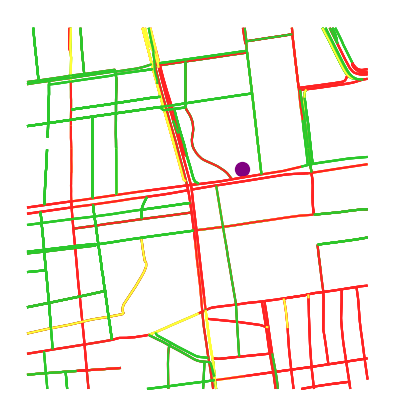

In [ ]:
stations_dir = "C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/estacionesCAMEcsv.csv"
stations = pd.read_csv(stations_dir)
stations = stations[stations["Key"]=="MER"]
for station in stations['Key']:
    dfs = df[df["station"]==station].copy()
    dfs.loc[:, "hour"] = dfs["time"].str[:2]
    dfs.loc[:, "datetime"] = pd.to_datetime(dfs['date'] + ' ' + dfs['hour'] + ':00', format='%d-%m-%Y %H:%M')
    datesunique = dfs["datetime"].unique()
    for dateunique in datesunique:
        df_datetime = dfs[dfs["datetime"]== dateunique]
        values = []
        lines = []
        coverages = []
        fechas = []
        horas = []
        station_name = []
        for i in range(0,len(df_datetime)):
                values.append(df_datetime.iloc[i]["traffic_level"])
                cadena = df_datetime.iloc[i]["coordinates"] #orden (longitude,latitude)
                lista = ast.literal_eval(cadena)
                lines.append(LineString(lista))
                coverages.append(df_datetime.iloc[i]['traffic_road_coverage'])
                fechas.append(df_datetime.iloc[i]["date"])
                horas.append(df_datetime.iloc[i]["time"])
                station_name.append(station)

        data = {"traffic_level": values,
                "roadCovrag": coverages,
                "date": fechas,
                "time": horas,
                "Coordinate": lines,
                "station": station_name}

        df_datetime = pd.DataFrame(data)
        df_datetime = gpd.GeoDataFrame(df_datetime, geometry='Coordinate')
        folder = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/traffic_flow/vector/traffic_images/"+station+"/"
        if not os.path.exists(folder):
                os.makedirs(folder)
        bins = [0, 0.01,0.8,0.9999,1]  
        labels = ['Stocked', 'Congested', 'Moderate', 'Fluid']
        df_datetime['speed_range'] = pd.cut(df_datetime['traffic_level'], bins=bins, labels=labels,include_lowest=True)
        colours = {
        'Stocked':'white',
        'Congested': '#FF2323',
        'Moderate': '#FFFF37',
        'Fluid': '#2BC82B',
        }
        station_latitude = stations[stations["Key"]==station].Latitude
        station_longitude = stations[stations["Key"]==station].Longitude
        df_datetime['colour'] =df_datetime['speed_range'].map(colours)
        fig, ax = plt.subplots(figsize=(6, 4))
        df_datetime.plot(ax=ax, color= df_datetime['colour'])
        ax.set_axis_off()
        date = df_datetime.date.iloc[0].replace("-","_")
        time = df_datetime.time.iloc[0].replace(":","_")
        img_name = folder+station+"_"+date+"_"+time+".png"
        plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
        plt.scatter([station_latitude], [station_longitude], color='purple', marker='o', s=100, label='MER')
        plt.savefig(img_name, bbox_inches='tight', pad_inches=0, dpi=100)
        plt.show()
        break
    break

Verano: inicia el 21 de junio y finaliza el 23 de septiembre. Otoño: inicia el 23 de septiembre y finaliza el 21 de diciembre. Invierno: inicia el 21 de diciembre y finaliza el 20 de marzo. Primavera: inicia el 20 de marzo y finaliza el 21 de junio.

In [66]:
base_path= r"C:\Users\valer\Documents\CIC\doctorado\air_pollution_data\vectores"
months = ["febrero", "marzo", "abril","mayo", "junio", "julio","agosto"]
dates_dict = {}
for month in months:
    dates_dict[month]=[]
"""
level = 0
for root, dirs, files in os.walk(dir):
    for month in dirs:
        for m in months:
            if month.startswith(m):
                dates_dict[m] = files
"""
result = {}
#result = month, date, number of hours 
for root, dirs, files in os.walk(base_path):
    nivel_relativo = os.path.relpath(root, base_path).split(os.sep)
    if len(nivel_relativo) == 1:  # Primer nivel
        carpeta_1 = nivel_relativo[0]
        for m in months:
            if carpeta_1.startswith(m):
                if m not in result:
                    result[m] = {}
    elif len(nivel_relativo) == 2:  # Segundo nivel
        carpeta_1, carpeta_2 = nivel_relativo
        for m in months:
            if carpeta_1.startswith(m):
                result[m][carpeta_2] = len(dirs)


In [67]:
for month, days in result.items():
    print(month,len(days))

abril 29
febrero 6
julio 25
junio 14
marzo 31
mayo 31


In [68]:
result["abril"]

{'2024-04-01': 24,
 '2024-04-02': 24,
 '2024-04-03': 24,
 '2024-04-04': 24,
 '2024-04-05': 24,
 '2024-04-06': 22,
 '2024-04-07': 23,
 '2024-04-08': 24,
 '2024-04-09': 24,
 '2024-04-11': 1,
 '2024-04-12': 24,
 '2024-04-13': 24,
 '2024-04-14': 24,
 '2024-04-15': 24,
 '2024-04-16': 24,
 '2024-04-17': 24,
 '2024-04-18': 24,
 '2024-04-19': 24,
 '2024-04-20': 24,
 '2024-04-21': 24,
 '2024-04-22': 24,
 '2024-04-23': 24,
 '2024-04-24': 24,
 '2024-04-25': 24,
 '2024-04-26': 24,
 '2024-04-27': 24,
 '2024-04-28': 24,
 '2024-04-29': 24,
 '2024-04-30': 24}

In [174]:
dir = "C:/Users/apx180/Documents/CIClocal/tesis/air_pollution_data/MER_prom_hr_sin_negativos.csv"
df = pd.read_csv(dir)
dflast = pd.read_csv("C:/Users/apx180/Documents/CIClocal/tesis/air_pollution_data/last_data_MER.csv")
df = pd.concat([df, dflast], axis=0, ignore_index=True)
df.head()

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP
0,2005/01/01 00:00,1.5,19.0,99.0,79.0,2.0,NaN,52.0,53.0,69.0,13.0,355.0,0.5
1,2005/01/01 01:00,6.4,182.0,277.0,95.0,0.0,NaN,99.0,55.0,20.0,11.0,134.0,0.2
2,2005/01/01 02:00,4.2,107.0,193.0,85.0,0.0,NaN,114.0,55.0,20.0,10.0,NaN,NaN
3,2005/01/01 03:00,3.7,79.0,156.0,77.0,0.0,NaN,140.0,57.0,18.0,10.0,NaN,NaN
4,2005/01/01 04:00,3.5,80.0,148.0,68.0,0.0,NaN,137.0,58.0,17.0,9.0,NaN,NaN


In [243]:
df2 = df[df.date>="2024/02/23 00:00"]
#df2 = df2[df2.date<"2024/06/01 00:00"]

In [232]:
bins = [0, 5, 9, 12, 16, 300]  
labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']  
df["AQI_CO"] = pd.cut(df["CO"], bins=bins, labels=labels)
bins = [0, 15,33,79,130,450]  
df["AQI_PM25"] = pd.cut(df["PM25"], bins=bins, labels=labels)
bins= [0, 45,60,132,213,730]  
df["AQI_PM10"] = pd.cut(df["PM10"], bins=bins, labels=labels)
category_limits = [0, 58, 90, 135, 175, 300]  
df["AQI_O3"] = pd.cut(df["O3"], bins=bins, labels=labels)
category_limits = [0, 53, 106, 160, 213, 210]  
df["AQI_NO2"] = pd.cut(df["NO2"], bins=bins, labels=labels)
category_limits = [0, 35,75,185,304,350]  
df["AQI_SO2"] = pd.cut(df["SO2"], bins=bins, labels=labels)


In [233]:
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,AQI_CO,AQI_CO_num,AQI_PM25,AQI_PM10,AQI_O3,AQI_NO2,AQI_SO2
0,2005/01/01 00:00,1.50,19.0,99.0,79.0,2.0,NaN,52.0,53.0,69.0,13.0,355.0,0.5,Good,0,Unhealthy,NaN,Good,Unhealthy,Unhealthy
1,2005/01/01 01:00,6.40,182.0,277.0,95.0,0.0,NaN,99.0,55.0,20.0,11.0,134.0,0.2,Moderate,1,Very Unhealthy,NaN,NaN,Unhealthy,Good
2,2005/01/01 02:00,4.20,107.0,193.0,85.0,0.0,NaN,114.0,55.0,20.0,10.0,NaN,NaN,Good,0,Very Unhealthy,NaN,NaN,Unhealthy,Good
3,2005/01/01 03:00,3.70,79.0,156.0,77.0,0.0,NaN,140.0,57.0,18.0,10.0,NaN,NaN,Good,0,Hazardous,NaN,NaN,Unhealthy,Good
4,2005/01/01 04:00,3.50,80.0,148.0,68.0,0.0,NaN,137.0,58.0,17.0,9.0,NaN,NaN,Good,0,Hazardous,NaN,NaN,Unhealthy,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260320,2024/09/30 19:00,0.95,6.0,34.0,28.0,13.0,17.0,10.0,80.0,2.0,17.0,353.0,2.2,Good,0,Good,Good,Good,Good,Good
260321,2024/09/30 20:00,1.04,7.0,40.0,33.0,6.0,13.0,10.0,82.0,2.0,17.0,9.0,2.0,Good,0,Good,Good,Good,Good,Good
260322,2024/09/30 21:00,0.79,3.0,29.0,26.0,11.0,21.0,14.0,80.0,1.0,17.0,360.0,2.4,Good,0,Good,Good,Good,Good,Good
260323,2024/09/30 22:00,0.74,3.0,27.0,24.0,13.0,16.0,9.0,75.0,1.0,17.0,353.0,2.8,Good,0,Good,Good,Good,Good,Good


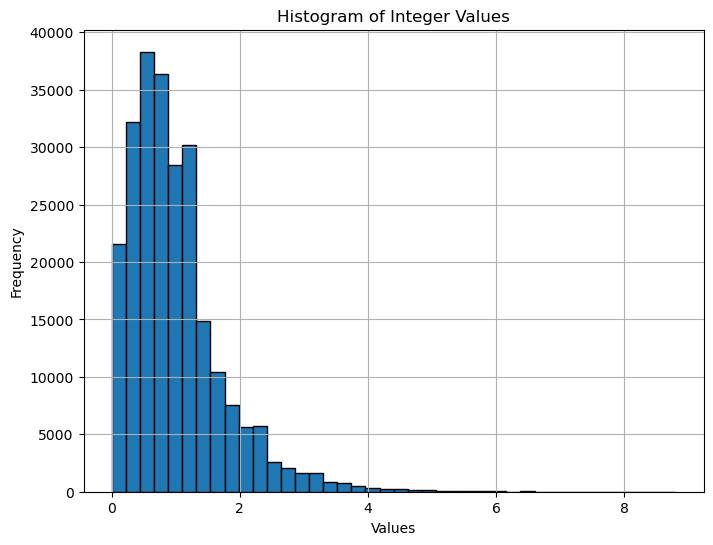

In [208]:
plt.figure(figsize=(8, 6))
df["CO"].hist(bins=40, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Integer Values')
plt.show()

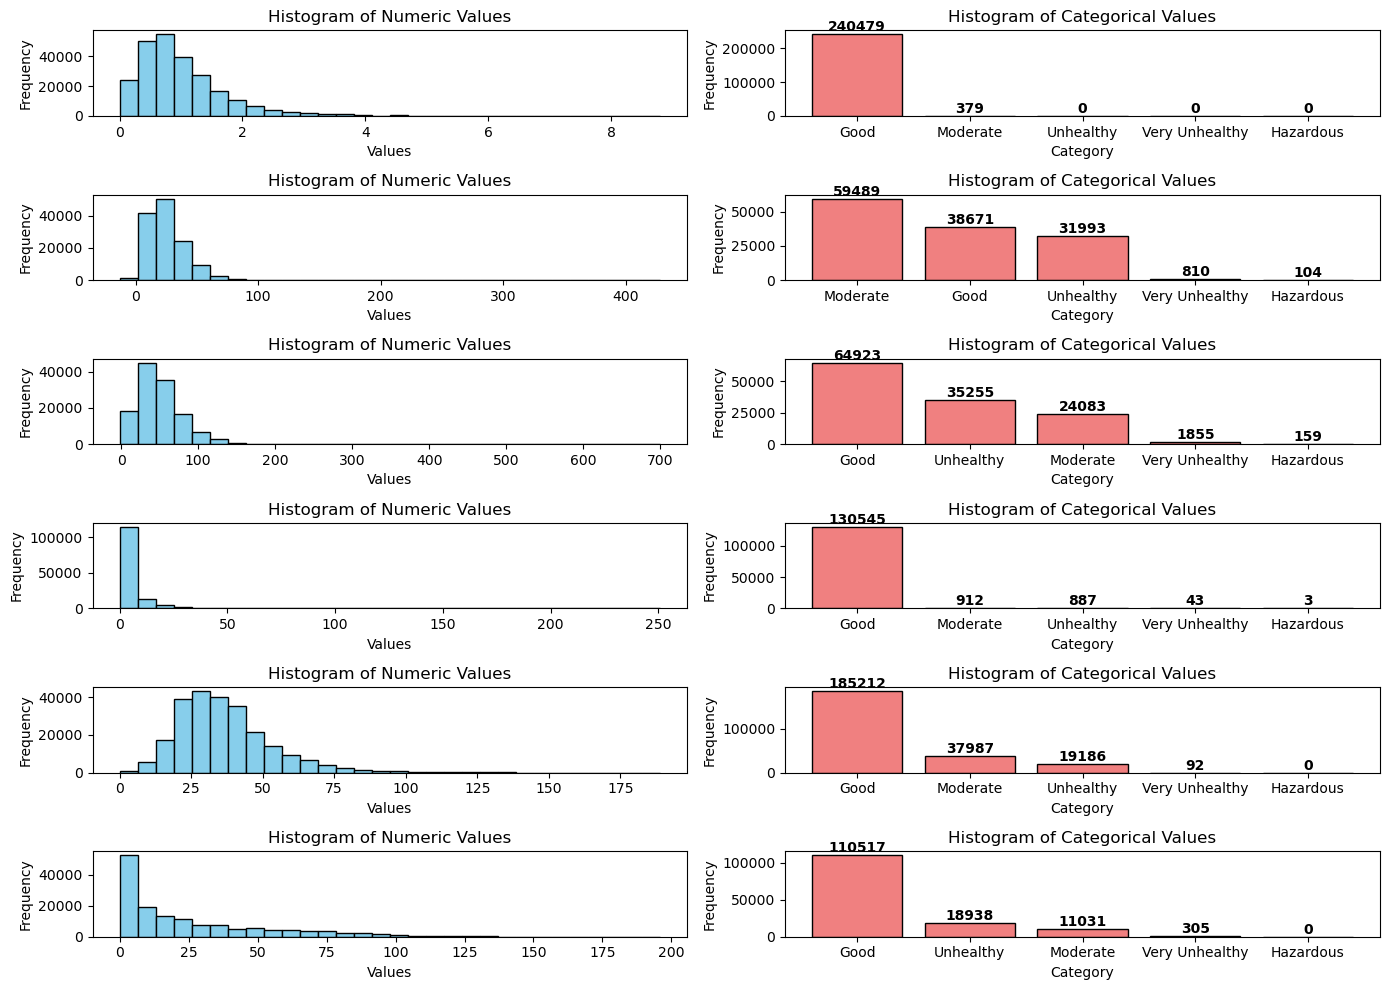

In [241]:
# Create the subplots
fig, axs = plt.subplots(6, 2, figsize=(14, 10))

# Subplot 1: Histogram of numeric values
axs[0,0].hist(df['CO'], bins=30, edgecolor='black', color='skyblue')
axs[0,0].set_title('Histogram of Numeric Values')
axs[0,0].set_xlabel('Values')
axs[0,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_CO"].value_counts()
axs[0,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[0,1].set_title('Histogram of Categorical Values')
axs[0,1].set_xlabel('Category')
axs[0,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[0,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

axs[1,0].hist(df['PM25'], bins=30, edgecolor='black', color='skyblue')
axs[1,0].set_title('Histogram of Numeric Values')
axs[1,0].set_xlabel('Values')
axs[1,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_PM25"].value_counts()
axs[1,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[1,1].set_title('Histogram of Categorical Values')
axs[1,1].set_xlabel('Category')
axs[1,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[1,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')


# Subplot 1: Histogram of numeric values
axs[2,0].hist(df['PM10'], bins=30, edgecolor='black', color='skyblue')
axs[2,0].set_title('Histogram of Numeric Values')
axs[2,0].set_xlabel('Values')
axs[2,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_PM10"].value_counts()
axs[2,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[2,1].set_title('Histogram of Categorical Values')
axs[2,1].set_xlabel('Category')
axs[2,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[2,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

axs[3,0].hist(df['SO2'], bins=30, edgecolor='black', color='skyblue')
axs[3,0].set_title('Histogram of Numeric Values')
axs[3,0].set_xlabel('Values')
axs[3,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_SO2"].value_counts()
axs[3,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[3,1].set_title('Histogram of Categorical Values')
axs[3,1].set_xlabel('Category')
axs[3,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[3,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')



axs[4,0].hist(df['NO2'], bins=30, edgecolor='black', color='skyblue')
axs[4,0].set_title('Histogram of Numeric Values')
axs[4,0].set_xlabel('Values')
axs[4,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_NO2"].value_counts()
axs[4,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[4,1].set_title('Histogram of Categorical Values')
axs[4,1].set_xlabel('Category')
axs[4,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[4,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')


# Subplot 1: Histogram of numeric values
axs[5,0].hist(df['O3'], bins=30, edgecolor='black', color='skyblue')
axs[5,0].set_title('Histogram of Numeric Values')
axs[5,0].set_xlabel('Values')
axs[5,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df["AQI_O3"].value_counts()
axs[5,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[5,1].set_title('Histogram of Categorical Values')
axs[5,1].set_xlabel('Category')
axs[5,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[5,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

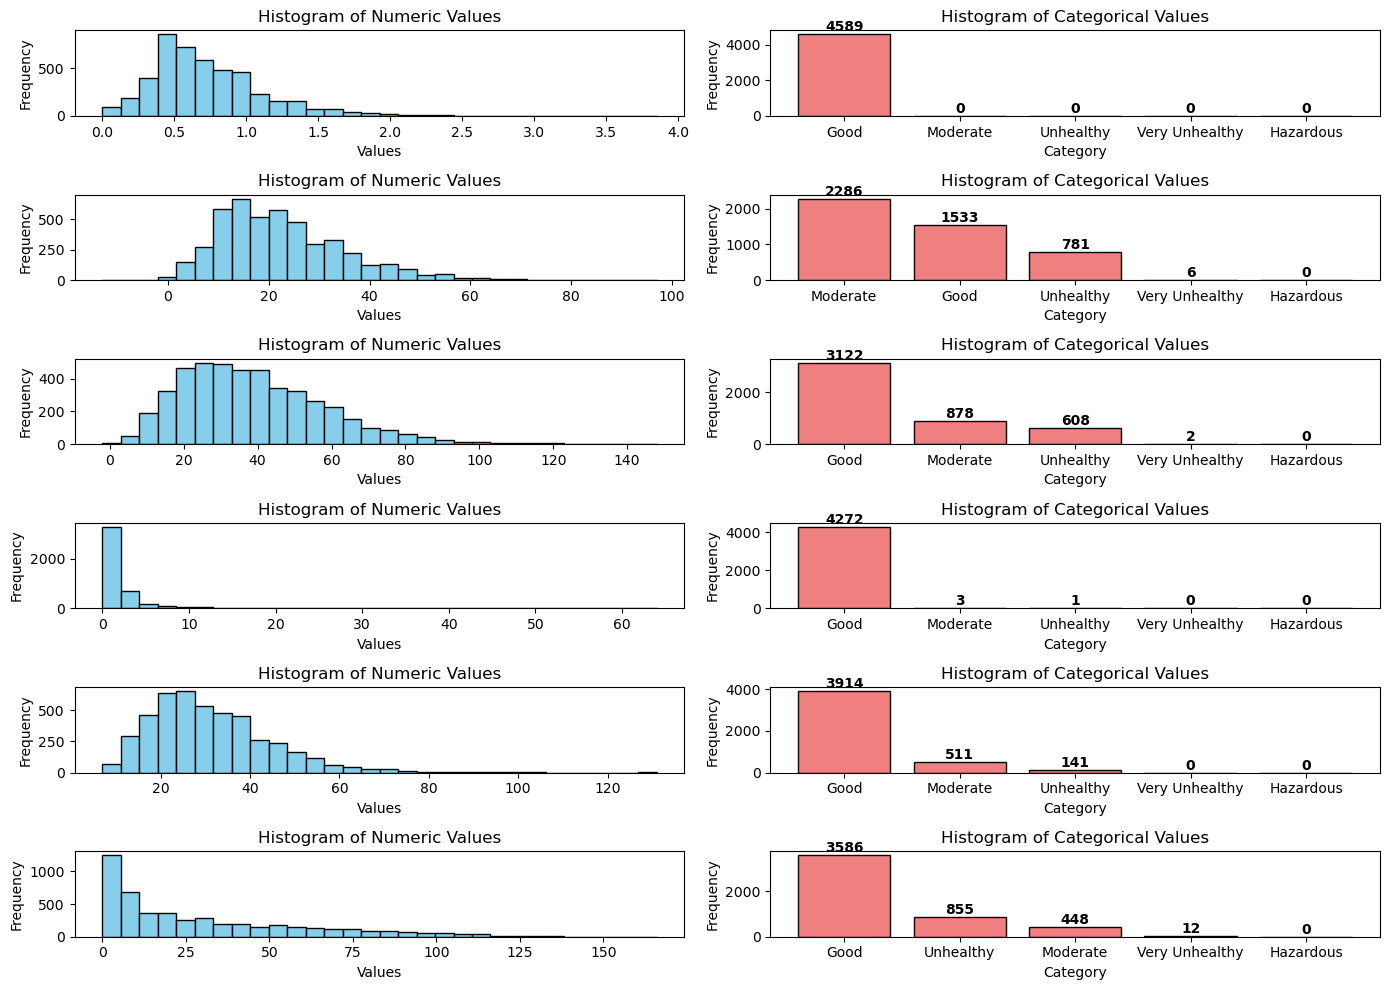

In [244]:
# Create the subplots
fig, axs = plt.subplots(6, 2, figsize=(14, 10))

# Subplot 1: Histogram of numeric values
axs[0,0].hist(df2['CO'], bins=30, edgecolor='black', color='skyblue')
axs[0,0].set_title('Histogram of Numeric Values')
axs[0,0].set_xlabel('Values')
axs[0,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_CO"].value_counts()
axs[0,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[0,1].set_title('Histogram of Categorical Values')
axs[0,1].set_xlabel('Category')
axs[0,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[0,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

axs[1,0].hist(df2['PM25'], bins=30, edgecolor='black', color='skyblue')
axs[1,0].set_title('Histogram of Numeric Values')
axs[1,0].set_xlabel('Values')
axs[1,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_PM25"].value_counts()
axs[1,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[1,1].set_title('Histogram of Categorical Values')
axs[1,1].set_xlabel('Category')
axs[1,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[1,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')


# Subplot 1: Histogram of numeric values
axs[2,0].hist(df2['PM10'], bins=30, edgecolor='black', color='skyblue')
axs[2,0].set_title('Histogram of Numeric Values')
axs[2,0].set_xlabel('Values')
axs[2,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_PM10"].value_counts()
axs[2,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[2,1].set_title('Histogram of Categorical Values')
axs[2,1].set_xlabel('Category')
axs[2,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[2,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

axs[3,0].hist(df2['SO2'], bins=30, edgecolor='black', color='skyblue')
axs[3,0].set_title('Histogram of Numeric Values')
axs[3,0].set_xlabel('Values')
axs[3,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_SO2"].value_counts()
axs[3,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[3,1].set_title('Histogram of Categorical Values')
axs[3,1].set_xlabel('Category')
axs[3,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[3,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')



axs[4,0].hist(df2['NO2'], bins=30, edgecolor='black', color='skyblue')
axs[4,0].set_title('Histogram of Numeric Values')
axs[4,0].set_xlabel('Values')
axs[4,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_NO2"].value_counts()
axs[4,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[4,1].set_title('Histogram of Categorical Values')
axs[4,1].set_xlabel('Category')
axs[4,1].set_ylabel('Frequency')
# Add counts on top of each bar in the categorical histogram
for index, value in enumerate(category_counts.values):
    axs[4,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')


# Subplot 1: Histogram of numeric values
axs[5,0].hist(df2['O3'], bins=30, edgecolor='black', color='skyblue')
axs[5,0].set_title('Histogram of Numeric Values')
axs[5,0].set_xlabel('Values')
axs[5,0].set_ylabel('Frequency')

# Subplot 2: Histogram-like bar chart for categorical values
category_counts = df2["AQI_O3"].value_counts()
axs[5,1].bar(category_counts.index, category_counts.values, color='lightcoral', edgecolor='black')
axs[5,1].set_title('Histogram of Categorical Values')
axs[5,1].set_xlabel('Category')
axs[5,1].set_ylabel('Frequency')

for index, value in enumerate(category_counts.values):
    axs[5,1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [161]:
def graficar_predicciones(new_hours, target, category_limits, variable, yvariable):

  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y/%m/%d %H:%M') for fecha in fechas]
  category_labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous']   
  colors = ['#9ACA3C', '#F7EC0F', '#F8991F', '#ED2124', '#7D287D', '#7E0023'] 
  colors = colors[0:len(category_limits)-1]
  category_labels = category_labels[0:len(category_limits)-1]
  # Crear el gráfico
  plt.figure(figsize=(10, 6))
  variable = variable +' values'
  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, target, markersize=2, label=variable, marker='o', linewidth=.3)
  #plt.plot(fechas_datetime, predicciones, label='Predicciones', marker='o')
  for limit in category_limits:
      plt.axhline(y=limit, color='gray', linestyle='--', linewidth=0.8)

      
  for i in range(len(category_limits)-1):
    plt.axhspan(category_limits[i], category_limits[i + 1], color=colors[i], alpha=0.6)


  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
  category_patches = [mpatches.Patch(color=colors[i], label=category_labels[i]) for i in range(len(colors))]

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Timestamp (date, hour and minute)')
  yvariable ='Pollutant Value (' + yvariable+')'
  plt.ylabel(yvariable)
  title1 = variable + ' and their AQI category'
  plt.title(title1)
  # Mostrar la leyenda
  #plt.legend()
  #plt.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', color='b', label='Values')])
  plt.legend(handles=category_patches + [plt.Line2D([0], [0], marker='o', label='Values')], loc= 'upper right')
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

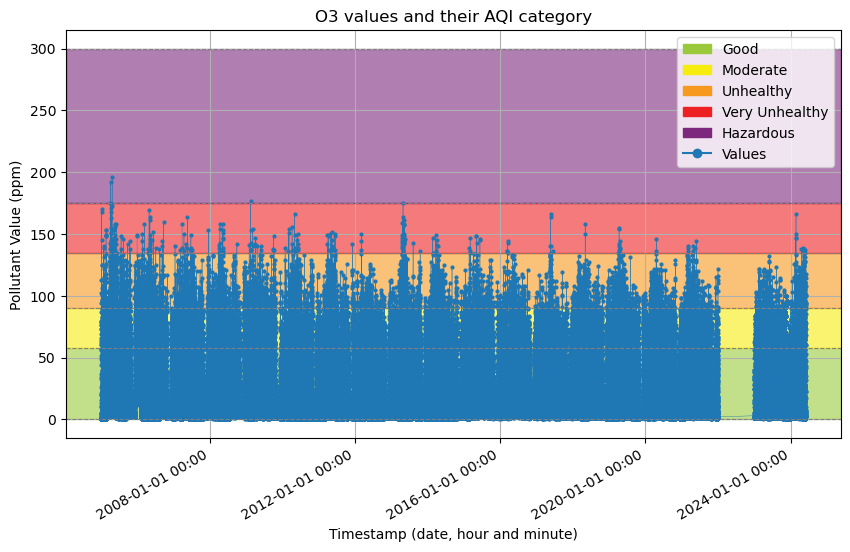

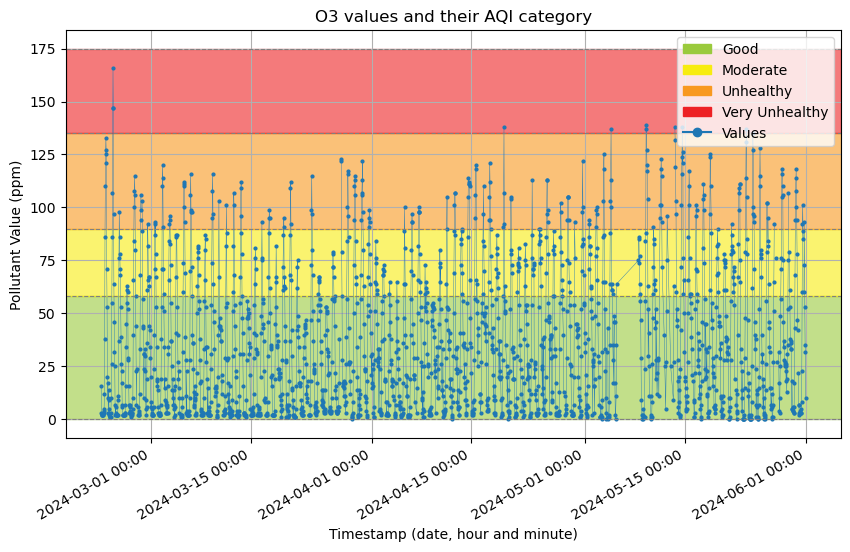

In [162]:
category_limits = [0, 58, 90, 135, 175, 300]  
graficar_predicciones(df.date, df.O3, category_limits, "O3", "ppm")
category_limits = [0, 58, 90, 135, 175]  
graficar_predicciones(df2.date, df2.O3, category_limits, "O3", "ppm")

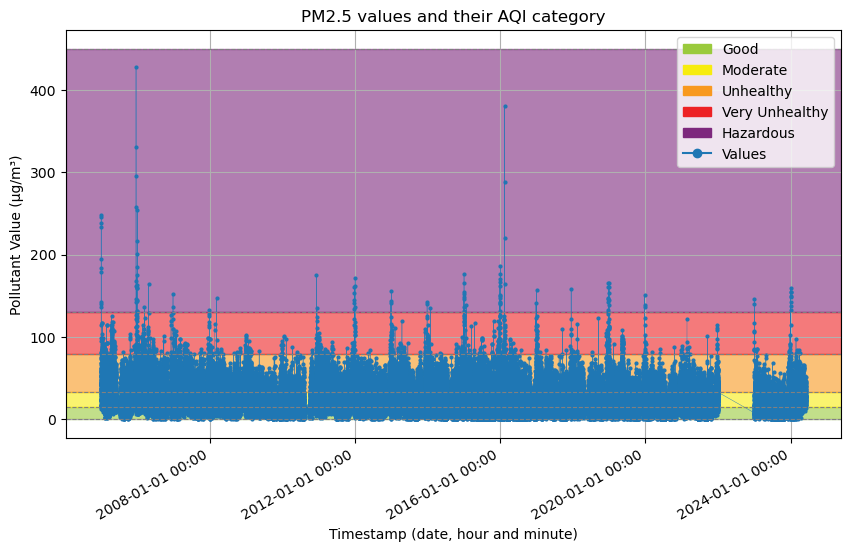

In [163]:
category_limits = [0, 15,33,79,130,450]  
graficar_predicciones(df.date, df.PM25, category_limits, "PM2.5", "µg/m³")

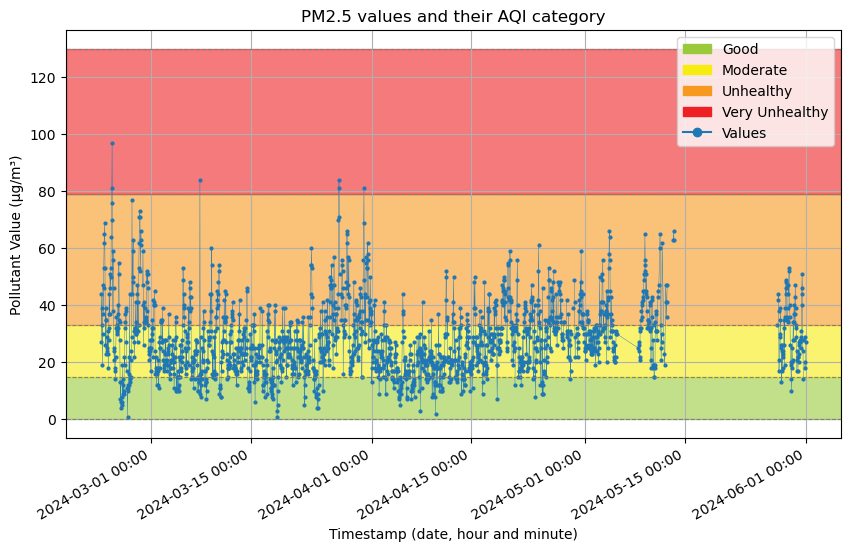

In [164]:
category_limits = [0, 15,33,79,130]  
graficar_predicciones(df2.date, df2.PM25, category_limits, "PM2.5", "µg/m³")

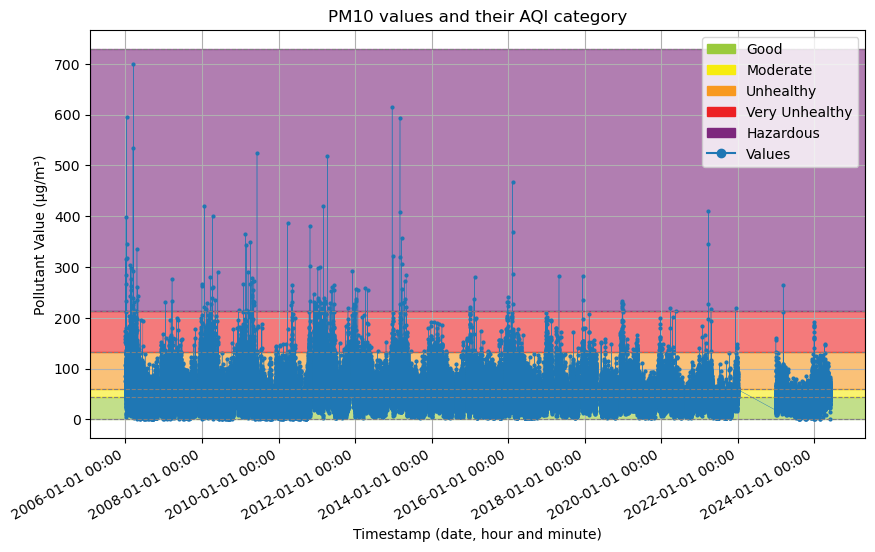

In [165]:
category_limits = [0, 45,60,132,213,730]  
graficar_predicciones(df.date, df.PM10, category_limits, "PM10", "µg/m³")

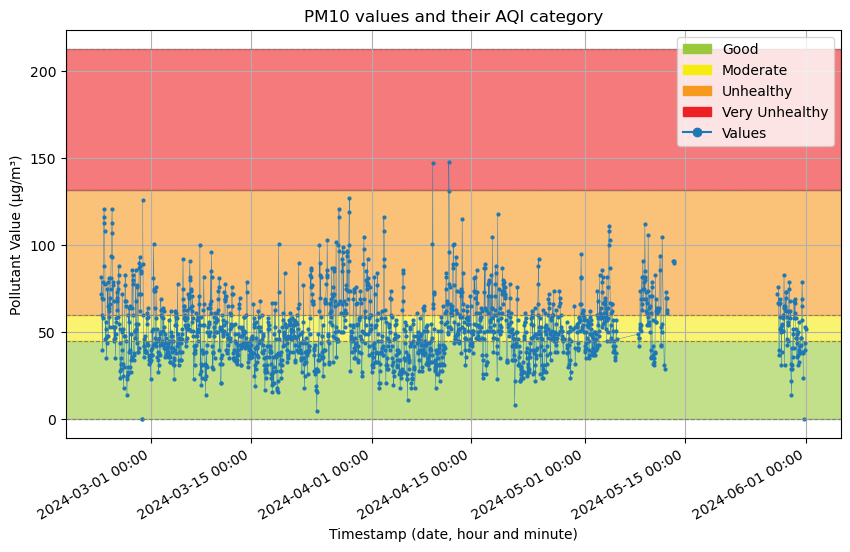

In [166]:
category_limits = [0, 45,60,132,213]  
graficar_predicciones(df2.date, df2.PM10, category_limits, "PM10", "µg/m³")

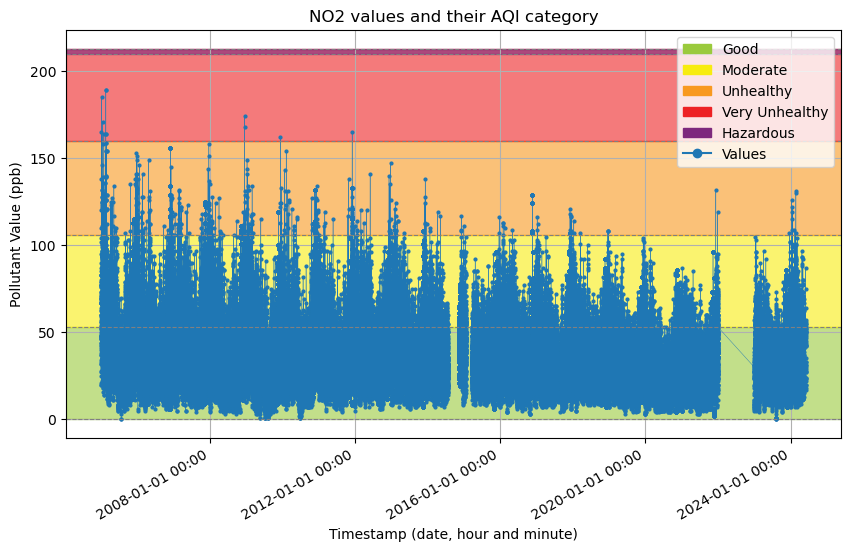

In [167]:
category_limits = [0, 53, 106, 160, 213, 210]  
graficar_predicciones(df.date, df.NO2, category_limits, "NO2", "ppb")

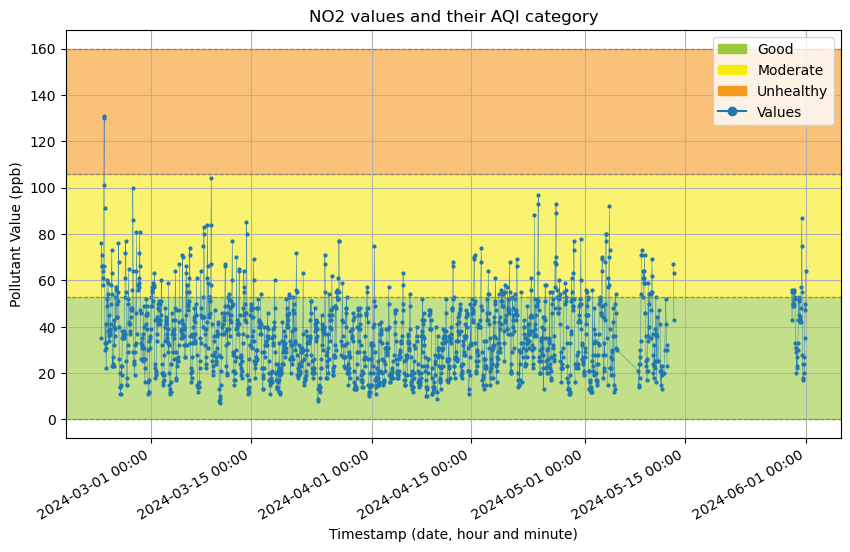

In [168]:
category_limits = [0, 53, 106, 160]  
graficar_predicciones(df2.date, df2.NO2, category_limits, "NO2", "ppb")

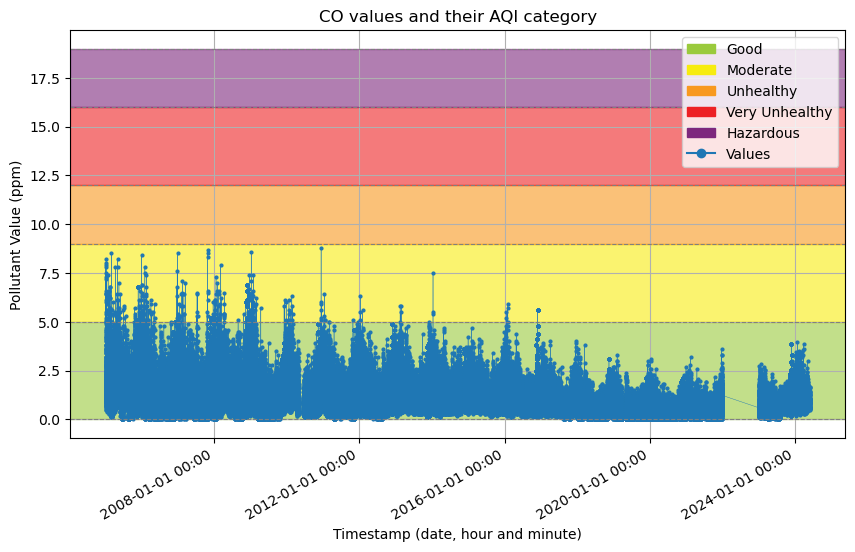

In [169]:
category_limits = [0, 5,9,12,16,19]  
graficar_predicciones(df.date, df.CO, category_limits, "CO", "ppm")

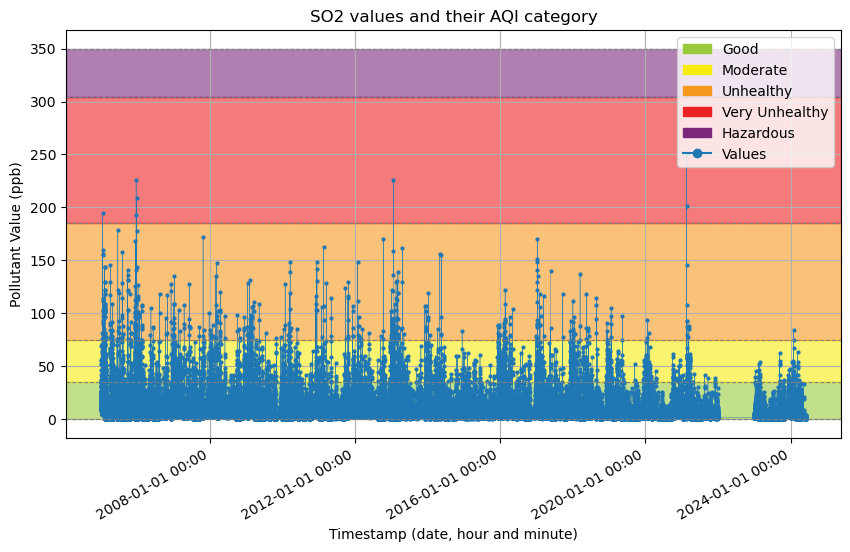

In [170]:
category_limits = [0, 35,75,185,304,350]  
graficar_predicciones(df.date, df.SO2, category_limits, "SO2", "ppb")

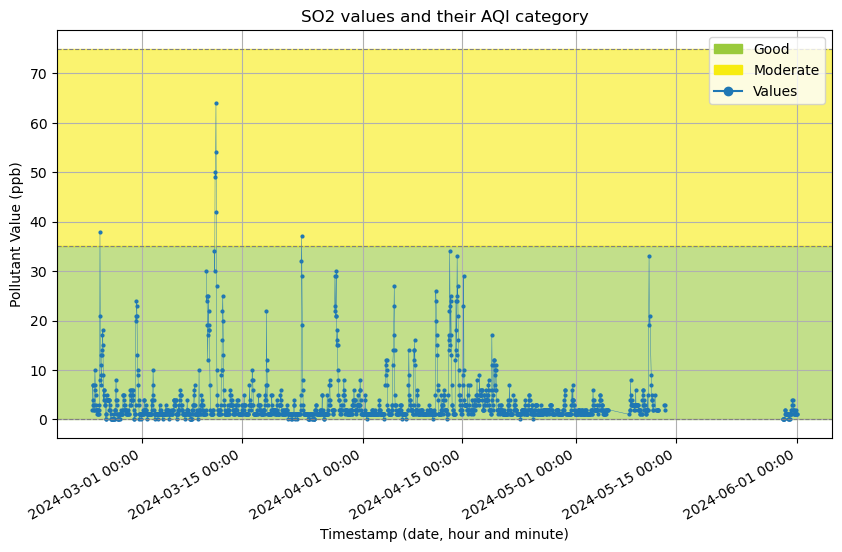

In [171]:
category_limits = [0, 35,75]
graficar_predicciones(df2.date, df2.SO2, category_limits, "SO2", "ppb")

In [7]:
dir_trfc = "C:/Users/apx180/Documents/CIClocal/tesis/air_pollution_data/geojsons/Recolectados por mas tiempo/datos_trafico_MER.geojson"
gdf = gpd.read_file(dir_trfc)
gdf.head()

Skipping field time: unsupported OGR type: 10


,traffic_level,roadCovrag,date,station,geometry
0,0.223,full,23-02-2024,MER,"LINESTRING (-99.12668 19.42515, -99.12671 19.4..."
1,0.252,full,23-02-2024,MER,"LINESTRING (-99.12921 19.43033, -99.12826 19.4..."
2,0.252,full,23-02-2024,MER,"LINESTRING (-99.12887 19.42603, -99.12863 19.4..."
3,0.300,full,23-02-2024,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4..."
4,0.300,full,23-02-2024,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4..."


In [30]:
gdf.date.min()

'09-08-2024'

In [ ]:
dir = "C:/Users/apx180/OneDrive - Queen Mary, University of London/Documents/CIC/air pollution data/geojsons/Recolectados por mas tiempo/datos_trafico_MER.geojson"

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from shapely.geometry import LineString
import pandas as pd

In [70]:
stations_dir = "C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/estacionesCAMEcsv.csv"
stations = pd.read_csv(stations_dir)

In [32]:
#dir = "C:/Users/apx180/Documents/CIClocal/tesis/TomTom data/datos_trafico_MER.geojson"
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution_data/geojsons/Recolectados por mas tiempo/datos_trafico_MER.geojson"
df = gpd.read_file(dir)
station = "MER"


c:\Users\valer\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\valer\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


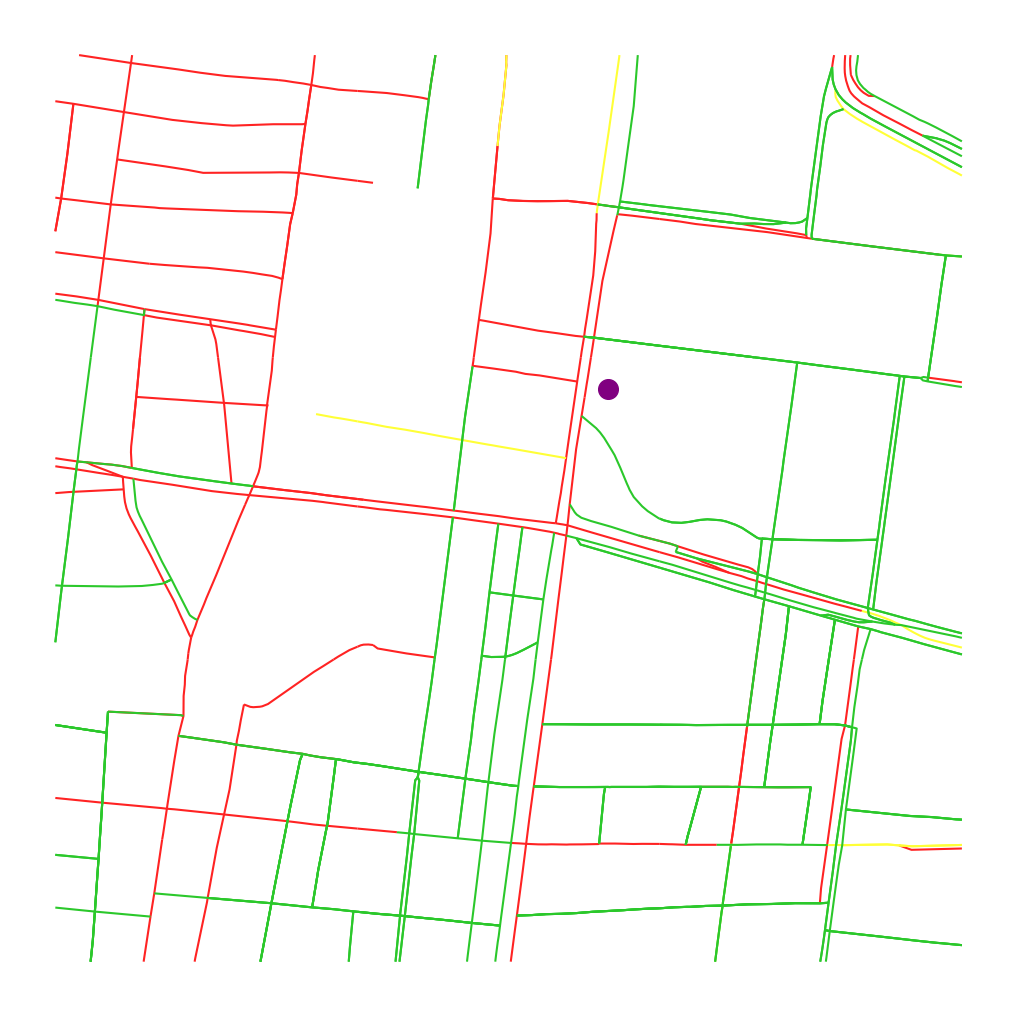

In [33]:
folder = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/traffic_flow/vector/traffic_images/"+station+"/"
for i in df.date.unique():
    df_date = df[df.date==i]
    for j in df_date.time.unique():
        df_time = df_date[df_date.time==j]
        bins = [0, 0.01,0.8,0.9999,1]  
        labels = ['Stocked', 'Congested', 'Moderate', 'Fluid']
        df_time['speed_range'] = pd.cut(df_time['traffic_level'], bins=bins, labels=labels,include_lowest=True)
        colours = {
            'Stocked':'white',
            'Congested': '#FF2323',
            'Moderate': '#FFFF37',
            'Fluid': '#2BC82B',
        }
        station_latitude = stations[stations["Key"]==station].Latitude
        station_longitude = stations[stations["Key"]==station].Longitude
        df_time['colour'] =df_time['speed_range'].map(colours)
        fig, ax = plt.subplots(figsize=(10, 10))
        df_time.plot(ax=ax, color= df_time['colour'])
        ax.set_axis_off()
        date = df_time.date.iloc[0].replace("-","_")
        time = df_time.time.iloc[0].replace(":","_")
        img_name = folder+station+"_"+date+"_"+time+".png"
        plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
        plt.scatter([station_longitude], [station_latitude], color='purple', marker='o', s=200, label='MER')
        plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
        plt.show()
        break
    break

In [34]:
df

,traffic_level,roadCovrag,date,time,station,geometry
0,0.223,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12668 19.42515, -99.12671 19.4..."
1,0.252,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12921 19.43033, -99.12826 19.4..."
2,0.252,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12887 19.42603, -99.12863 19.4..."
3,0.300,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4..."
4,0.300,full,23-02-2024,13:56:17,MER,"LINESTRING (-99.12509 19.42915, -99.12516 19.4..."
...,...,...,...,...,...,...
575812,1.000,one_side,25-03-2024,01:05:11,MER,"LINESTRING (-99.11316 19.41508, -99.11353 19.4..."
575813,1.000,one_side,25-03-2024,01:05:11,MER,"LINESTRING (-99.11565 19.41533, -99.11556 19.4..."
575814,1.000,one_side,25-03-2024,01:05:11,MER,"LINESTRING (-99.11527 19.41740, -99.11411 19.4..."
575815,1.000,one_side,25-03-2024,01:05:11,MER,"LINESTRING (-99.11527 19.41740, -99.11411 19.4..."


In [ ]:
bins = [0, 0.01,0.8,0.9999,1]  
labels = ['0-10 km/h', '11-40 km/h', '41-60 km/h', '61-180 km/h']
#streets_df['SPEED_CAT'] = streets_df['SPEED_CAT'].fillna(0).astype(int)  # Replacing NaNs with 0
#streets_df['speed_num'] = streets_df['SPEED_CAT'].astype(int)
#streets_df['speed_num'] = streets_df['speed_num'].dropna().astype(int)
df['rango_velocidad'] = pd.cut(df['traffic_level'], bins=bins, labels=labels)

colores = {
    '0-10 km/h':'#777777',
    '11-40 km/h': '#FF2323',
    '41-60 km/h': '#FFFF37',
    '61-180 km/h': '#2BC82B',
}

df['color'] =df['rango_velocidad'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, color= df['color'])
ax.set_axis_off()
#date = place_file.iloc[7][0][-6:]
date = df.date.iloc[0].replace("-","_")
time = df.time.iloc[0].replace(":","_")
img_name = date+time+".png"
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
plt.show()